In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import missingno as msno

Primero importamos los datos y los convertimos para poder manejarlos:

In [2]:
archivo_parquet_business = "D:/Proyecto final filtrado/yelp/business_clean.parquet"
archivo_parquet_checkin = "D:/Proyecto final filtrado/yelp/checkin_clean.parquet"
archivo_parquet_reviews = "D:/Proyecto final filtrado/yelp/reviews_clean.parquet"
archivo_parquet_tip = "D:/Proyecto final filtrado/yelp/tip_clean.parquet"
archivo_parquet_users = "D:/Proyecto final filtrado/yelp/users_clean.parquet"

archivo_maps_cathegory = "D:/Proyecto final filtrado/maps/dfCategory.parquet"
archivo_maps_final = "D:/Proyecto final filtrado/maps/df_final.parquet"

df_business = pd.read_parquet(archivo_parquet_business)
df_checkin = pd.read_parquet(archivo_parquet_checkin)
df_reviews = pd.read_parquet(archivo_parquet_reviews)
df_tips = pd.read_parquet(archivo_parquet_tip)
df_users = pd.read_parquet(archivo_parquet_users)

df_maps_cathegory = pd.read_parquet(archivo_maps_cathegory)
df_maps_final = pd.read_parquet(archivo_maps_final)

Con el criterio de solo tener en cuenta los lugares rentables para nuestro modelo de negocio y como resultado del analisis preliminar de la data: elegimos las ciudades siguientes: 

In [3]:
archivo_parquet_California = "D:/Proyecto final filtrado/maps/dfCalifornia.parquet"
archivo_parquet_Florida = "D:/Proyecto final filtrado/maps/dfFlorida.parquet"
archivo_parquet_Illinois = "D:/Proyecto final filtrado/maps/dfIllinois.parquet"
archivo_parquet_Nevada = "D:/Proyecto final filtrado/maps/dfNevada.parquet"
archivo_parquet_NY = "D:/Proyecto final filtrado/maps/dfNY.parquet"
archivo_parquet_Pennsylvania = "D:/Proyecto final filtrado/maps/dfPennsylvania.parquet"
archivo_parquet_Texas = "D:/Proyecto final filtrado/maps/dfTexas.parquet"

In [4]:
df_CALIFORNIA = pd.read_parquet(archivo_parquet_California)
df_FLORIDA = pd.read_parquet(archivo_parquet_Florida)
df_ILLINOIS = pd.read_parquet(archivo_parquet_Illinois)
df_NEVADA = pd.read_parquet(archivo_parquet_Nevada)
df_NY = pd.read_parquet(archivo_parquet_NY)
df_PENNSYLVANIA = pd.read_parquet(archivo_parquet_Pennsylvania)
df_TEXAS = pd.read_parquet(archivo_parquet_Texas)

Voy a definir una funciones para poder llamarlas a lo largo de todo el análisis:

In [19]:
def analizar_nulos(df):

    null_values_count = df.isnull().sum()
    
    null_values_percentage = (null_values_count / len(df)) * 100
    
    null_table = pd.DataFrame({
        'Valores nulos': null_values_count,
        'Porcentaje nulos (%)': null_values_percentage
    })
    
    null_table = null_table[null_table['Valores nulos'] > 0]
    
    null_table = null_table.sort_values(by='Porcentaje nulos (%)', ascending=False)
    
    print(null_table)
    
    return null_table

In [32]:
def analizar_duplicados(df):

    columnas_validas = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, (dict, list))).sum() == 0]

    duplicated_count = df[columnas_validas].duplicated().sum()
    
    duplicated_percentage = (duplicated_count / len(df)) * 100

    duplicated_table = pd.DataFrame({
        'Valores duplicados': [duplicated_count],
        'Porcentaje duplicados (%)': [duplicated_percentage]
    })
    
    print(duplicated_table)
    return duplicated_table

In [34]:
def analizar_outliers(df):

    columnas_numericas = df.select_dtypes(include=['number'])
    
    Q1 = columnas_numericas.quantile(0.25)
    Q3 = columnas_numericas.quantile(0.75)
    IQR = Q3 - Q1

    outliers = ((columnas_numericas < (Q1 - 1.5 * IQR)) | (columnas_numericas > (Q3 + 1.5 * IQR)))

    outliers_count = outliers.sum()

    outliers_percentage = (outliers_count / len(df)) * 100

    outliers_table = pd.DataFrame({
        'Outliers': outliers_count,
        'Porcentaje outliers (%)': outliers_percentage
    })
    
    outliers_table = outliers_table[outliers_table['Outliers'] > 0]
    
    outliers_table = outliers_table.sort_values(by='Porcentaje outliers (%)', ascending=False)
    
    print(outliers_table)
    return outliers_table

In [37]:
def analizar_faltantes(df):

    missing_count = df.isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    missing_table = pd.DataFrame({
        'Valores faltantes': missing_count,
        'Porcentaje faltantes (%)': missing_percentage
    })
    
    missing_table = missing_table[missing_table['Valores faltantes'] > 0]
    missing_table = missing_table.sort_values(by='Porcentaje faltantes (%)', ascending=False)

    print(missing_table)
    return missing_table

sumo esta función que genera un reporte consolidado de valores nulos, duplicados y outliers en un DataFrame

In [43]:
def reporte_analisis(df):
    columnas_numericas = df.select_dtypes(include=['number'])

    null_values = df.isnull().sum()
    null_percentage = (null_values / len(df)) * 100

    duplicated_count = df.duplicated().sum()
    duplicated_percentage = (duplicated_count / len(df)) * 100

    Q1 = columnas_numericas.quantile(0.25)
    Q3 = columnas_numericas.quantile(0.75)
    IQR = Q3 - Q1

    outliers = ((columnas_numericas < (Q1 - 1.5 * IQR)) | (columnas_numericas > (Q3 + 1.5 * IQR))).sum()
    outliers_percentage = (outliers / len(df)) * 100

    report = pd.DataFrame({
        'Valores nulos': null_values,
        'Porcentaje nulos (%)': null_percentage,
        'Outliers': outliers,
        'Porcentaje outliers (%)': outliers_percentage
    })

    report.loc['Duplicados'] = [duplicated_count, duplicated_percentage, None, None]

    print(report)
    return report

para usar todas las funciones:

In [11]:
#analizar_nulos(df_nuevo)

#analizar_duplicados(df_nuevo)

#analizar_outliers(df_nuevo)

#visualizar_faltantes(df_nuevo)

#reporte_analisis(df_nuevo)


In [3]:
df_checkin.head(2)

,business_id,date
14,--OS_I7dnABrXvRCCuWOGQ,2018-05-11 18:23:36
32,--sXnWH9Xm6_NvIjyuA99w,"2011-06-08 19:26:16, 2011-07-31 02:53:37, 2011..."


Podemos ver que cada negocio tiene un ID, lo que permitirá relacionar el negocio con la fecha de apertura del mismo usando esta tabla. 

In [21]:
df_business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,IN,19106,39.953949,-75.143226,4.0,245,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Sushi Bars, Restaurants, Japanese","{'Friday': '13:30-23:0', 'Monday': None, 'Satu..."


In [22]:
analizar_nulos(df_business)

            Valores nulos  Porcentaje nulos (%)
hours                2789             19.115833
attributes           1173              8.039753
categories              9              0.061686


,Valores nulos,Porcentaje nulos (%)
hours,2789,19.115833
attributes,1173,8.039753
categories,9,0.061686


In [33]:
analizar_duplicados(df_business)

   Valores duplicados  Porcentaje duplicados (%)
0                   0                        0.0


,Valores duplicados,Porcentaje duplicados (%)
0,0,0.0


In [35]:
analizar_outliers(df_business)

              Outliers  Porcentaje outliers (%)
longitude         2877                19.718986
review_count      1825                12.508568
latitude           298                 2.042495


,Outliers,Porcentaje outliers (%)
longitude,2877,19.718986
review_count,1825,12.508568
latitude,298,2.042495


In [39]:
analizar_faltantes(df_business)

            Valores faltantes  Porcentaje faltantes (%)
hours                    2789                 19.115833
attributes               1173                  8.039753
categories                  9                  0.061686


,Valores faltantes,Porcentaje faltantes (%)
hours,2789,19.115833
attributes,1173,8.039753
categories,9,0.061686


In [44]:
reporte_analisis(df_reviews)

             Valores nulos  Porcentaje nulos (%)  Outliers  \
business_id            0.0                   0.0       NaN   
cool                   0.0                   0.0   52001.0   
date                   0.0                   0.0       NaN   
funny                  0.0                   0.0  176515.0   
review_id              0.0                   0.0       NaN   
stars                  0.0                   0.0       0.0   
text                   0.0                   0.0       NaN   
useful                 0.0                   0.0   42422.0   
user_id                0.0                   0.0       NaN   
Duplicados             0.0                   0.0       NaN   

             Porcentaje outliers (%)  
business_id                      NaN  
cool                        5.390330  
date                             NaN  
funny                      18.297227  
review_id                        NaN  
stars                       0.000000  
text                             NaN  
usefu

,Valores nulos,Porcentaje nulos (%),Outliers,Porcentaje outliers (%)
business_id,0.0,0.0,NaN,NaN
cool,0.0,0.0,52001.0,5.390330
date,0.0,0.0,NaN,NaN
funny,0.0,0.0,176515.0,18.297227
review_id,0.0,0.0,NaN,NaN
stars,0.0,0.0,0.0,0.000000
text,0.0,0.0,NaN,NaN
useful,0.0,0.0,42422.0,4.397388
user_id,0.0,0.0,NaN,NaN
Duplicados,0.0,0.0,NaN,NaN


Notamos que no hay nulos, aunque si outliers.

In [3]:
df_maps_cathegory.head(2)

,gmap_id,category
0,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,Textile exporter
1,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Korean restaurant


Vemos que la tabla Maps Category nos va a permitir relacionar el id de google maps (ubicacion) con la categoria del negocio. 

para el siguiente dataset, que tiene 37 columnas, voy a usar el comando para que no me reduzca la vista al ejecutar head().

In [45]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [46]:
df_maps_final.head(2)

,name,address,gmap_id,description,latitude,longitude,avg_rating,num_of_reviews,price,state,url,city,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Accessibility,Activities,Amenities,Atmosphere,Crowd,Dining options,From the business,Getting here,Health & safety,Health and safety,Highlights,Lodging options,Offerings,Payments,Planning,Popular for,Recycling,Service options
0,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.21529,4.5,6,None,Open now,https://www.google.com/maps/place//data=!4m2!3...,Los Angeles,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,None,None,None,None,None,None
1,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.29213,4.4,18,None,Open ⋅ Closes 6PM,https://www.google.com/maps/place//data=!4m2!3...,Los Angeles,Closed,6:30AM–6PM,6:30AM–6PM,6:30AM–6PM,6:30AM–6PM,6:30AM–6PM,7AM–12PM,[Wheelchair accessible entrance],None,[Good for kids],[Casual],None,None,None,None,None,NaN,None,NaN,[Comfort food],None,None,None,None,"[Takeout, Dine-in, Delivery]"


In [47]:
missing_values_summary = df_maps_final.isnull().sum()
print("Resumen de valores nulos o vacíos en cada columna:")
print(missing_values_summary)

Resumen de valores nulos o vacíos en cada columna:
name                      0
address                   0
gmap_id                   0
description          163053
latitude                  0
longitude                 0
avg_rating                0
num_of_reviews            0
price                165867
state                 39881
url                       0
city                      0
Monday                41774
Tuesday               41774
Wednesday             41774
Thursday              41774
Friday                41774
Saturday              41774
Sunday                41774
Accessibility         71906
Activities           185952
Amenities            151453
Atmosphere           169834
Crowd                174815
Dining options       173838
From the business    179195
Getting here         185380
Health & safety      159809
Health and safety    185981
Highlights           168918
Lodging options      185981
Offerings            156537
Payments             157479
Planning             1348

In [50]:
def reporte_analisis(df):
    columnas_validas = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, (list, np.ndarray))).sum() == 0]

    df_filtrado = df[columnas_validas]

    columnas_numericas = df_filtrado.select_dtypes(include=['number'])

    null_values = df_filtrado.isnull().sum()
    null_percentage = (null_values / len(df_filtrado)) * 100

    duplicated_count = df_filtrado.duplicated().sum()
    duplicated_percentage = (duplicated_count / len(df_filtrado)) * 100

    Q1 = columnas_numericas.quantile(0.25)
    Q3 = columnas_numericas.quantile(0.75)
    IQR = Q3 - Q1

    outliers = ((columnas_numericas < (Q1 - 1.5 * IQR)) | (columnas_numericas > (Q3 + 1.5 * IQR))).sum()
    outliers_percentage = (outliers / len(df_filtrado)) * 100

    report = pd.DataFrame({
        'Valores nulos': null_values,
        'Porcentaje nulos (%)': null_percentage,
        'Outliers': outliers,
        'Porcentaje outliers (%)': outliers_percentage
    })

    report.loc['Duplicados'] = [duplicated_count, duplicated_percentage, None, None]

    print(report)
    return report

In [51]:
reporte_analisis(df_maps_final)

                   Valores nulos  Porcentaje nulos (%)  Outliers  \
Friday                   41774.0             22.461434       NaN   
Health and safety       185981.0            100.000000       0.0   
Lodging options         185981.0            100.000000       0.0   
Monday                   41774.0             22.461434       NaN   
Saturday                 41774.0             22.461434       NaN   
Sunday                   41774.0             22.461434       NaN   
Thursday                 41774.0             22.461434       NaN   
Tuesday                  41774.0             22.461434       NaN   
Wednesday                41774.0             22.461434       NaN   
address                      0.0              0.000000       NaN   
avg_rating                   0.0              0.000000    7463.0   
city                         0.0              0.000000       NaN   
description             163053.0             87.671859       NaN   
gmap_id                      0.0              0.

,Valores nulos,Porcentaje nulos (%),Outliers,Porcentaje outliers (%)
Friday,41774.0,22.461434,NaN,NaN
Health and safety,185981.0,100.000000,0.0,0.000000
Lodging options,185981.0,100.000000,0.0,0.000000
Monday,41774.0,22.461434,NaN,NaN
Saturday,41774.0,22.461434,NaN,NaN
Sunday,41774.0,22.461434,NaN,NaN
Thursday,41774.0,22.461434,NaN,NaN
Tuesday,41774.0,22.461434,NaN,NaN
Wednesday,41774.0,22.461434,NaN,NaN
address,0.0,0.000000,NaN,NaN


podria usar description y avg_rating para relacionar con ML

In [52]:
maps_final = df_maps_final[['description','avg_rating']]

In [53]:
porcentaje_nulos = df_maps_final.isnull().mean() * 100

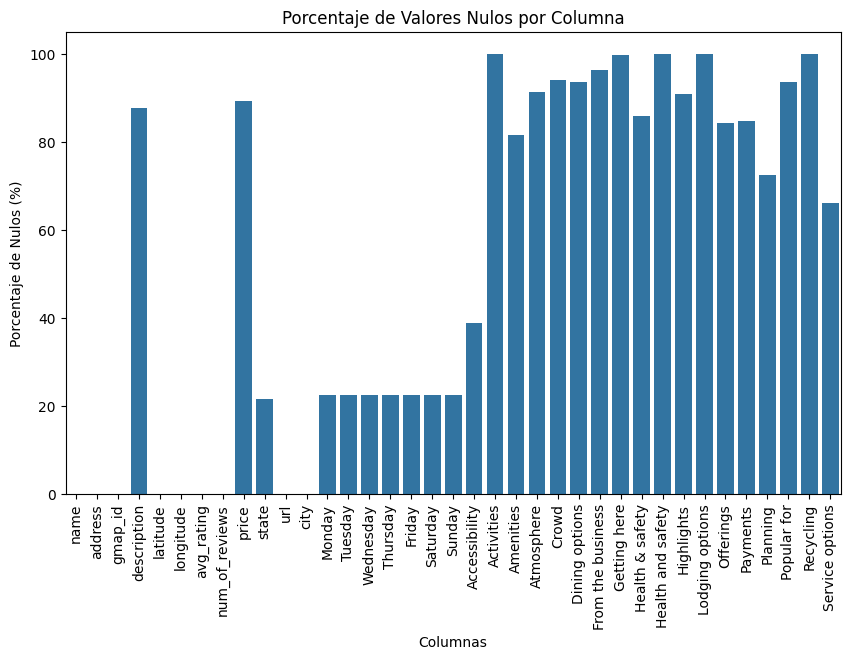

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x=porcentaje_nulos.index, y=porcentaje_nulos.values)
plt.xticks(rotation=90)
plt.title("Porcentaje de Valores Nulos por Columna")
plt.xlabel("Columnas")
plt.ylabel("Porcentaje de Nulos (%)")

plt.show()

De este dataset, podemos descartar por su alto porcentaje de valores nulos: Descripction, state, activities, amenities, armosphere, crowd, dining options, from the vusiness, getting here, health and safety, highlights, lodging options, offerings, payments, planning, popular for, recycling, service options.

In [55]:
df_tips.head(3)

,user_id,business_id,text,date,compliment_count
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
20,FQ-zmWPEG_pjSQx6pt3Efw,3ZynJ94VpIdDlaArmEp2Rg,"Yes, I'm eating here again. Breakfast!",2012-10-12 15:16:13,0
34,YnlCpuaBa3qWBp4te8pGmA,XIKYdKWq72zUYsq8NBxcCQ,The honey glazed salmon is amazing!,2018-01-14 15:00:01,0


In [56]:
df_tips.size

593220

In [57]:
reporte_analisis(df_tips)

                  Valores nulos  Porcentaje nulos (%)  Outliers  \
business_id                 0.0              0.000000       NaN   
compliment_count            0.0              0.000000    1386.0   
date                        0.0              0.000000       NaN   
text                        0.0              0.000000       NaN   
user_id                     0.0              0.000000       NaN   
Duplicados                 16.0              0.013486       NaN   

                  Porcentaje outliers (%)  
business_id                           NaN  
compliment_count                 1.168201  
date                                  NaN  
text                                  NaN  
user_id                               NaN  
Duplicados                            NaN  


,Valores nulos,Porcentaje nulos (%),Outliers,Porcentaje outliers (%)
business_id,0.0,0.000000,NaN,NaN
compliment_count,0.0,0.000000,1386.0,1.168201
date,0.0,0.000000,NaN,NaN
text,0.0,0.000000,NaN,NaN
user_id,0.0,0.000000,NaN,NaN
Duplicados,16.0,0.013486,NaN,NaN


Notamos que no tiene nulos ni valores significativos de outliers.

Esta tabla TIPS puede servir para entrenar el LLM y entender las devoluciones en relacion al modelo de negocio: Nube de palabras para cata categoría de negocio, por ejemplo.

In [58]:
df_users.head(2)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
706,cs0nysSMTvZiSH2wT0lziw,Daniel,31,2010-05-31 23:39:00,14,4,3,,"6XwMvX4ToWjilX3tstVMRg, aACIvjX3mTBm7XVGGvVk9Q...",2,3.74,0,2,0,0,0,0,1,0,0,0,0
707,DAu7QqovDW9VYgede5Biaw,Joel,38,2010-08-01 04:02:38,34,5,10,,"5-LXxNNX8hH0Qk16BlPU3A, w6sICte1gxxcOLf07P2jJw...",0,2.82,0,0,0,0,0,0,1,1,1,1,0


In [59]:
reporte_analisis(df_users)

                    Valores nulos  Porcentaje nulos (%)  Outliers  \
average_stars                 0.0                   0.0       0.0   
compliment_cool               0.0                   0.0   17093.0   
compliment_cute               0.0                   0.0    3118.0   
compliment_funny              0.0                   0.0   17093.0   
compliment_hot                0.0                   0.0   11661.0   
compliment_list               0.0                   0.0    1310.0   
compliment_more               0.0                   0.0   11186.0   
compliment_note               0.0                   0.0   23108.0   
compliment_photos             0.0                   0.0    9192.0   
compliment_plain              0.0                   0.0   24885.0   
compliment_profile            0.0                   0.0    4677.0   
compliment_writer             0.0                   0.0   14461.0   
cool                          0.0                   0.0   25118.0   
elite                         0.0 

,Valores nulos,Porcentaje nulos (%),Outliers,Porcentaje outliers (%)
average_stars,0.0,0.0,0.0,0.000000
compliment_cool,0.0,0.0,17093.0,10.439366
compliment_cute,0.0,0.0,3118.0,1.904285
compliment_funny,0.0,0.0,17093.0,10.439366
compliment_hot,0.0,0.0,11661.0,7.121830
compliment_list,0.0,0.0,1310.0,0.800068
compliment_more,0.0,0.0,11186.0,6.831729
compliment_note,0.0,0.0,23108.0,14.112962
compliment_photos,0.0,0.0,9192.0,5.613915
compliment_plain,0.0,0.0,24885.0,15.198246


vemos que no tiene problemas de valores faltantes pero quizá sí con los outliers, buscaremos graficar para poder entender demanera más general y rápida.

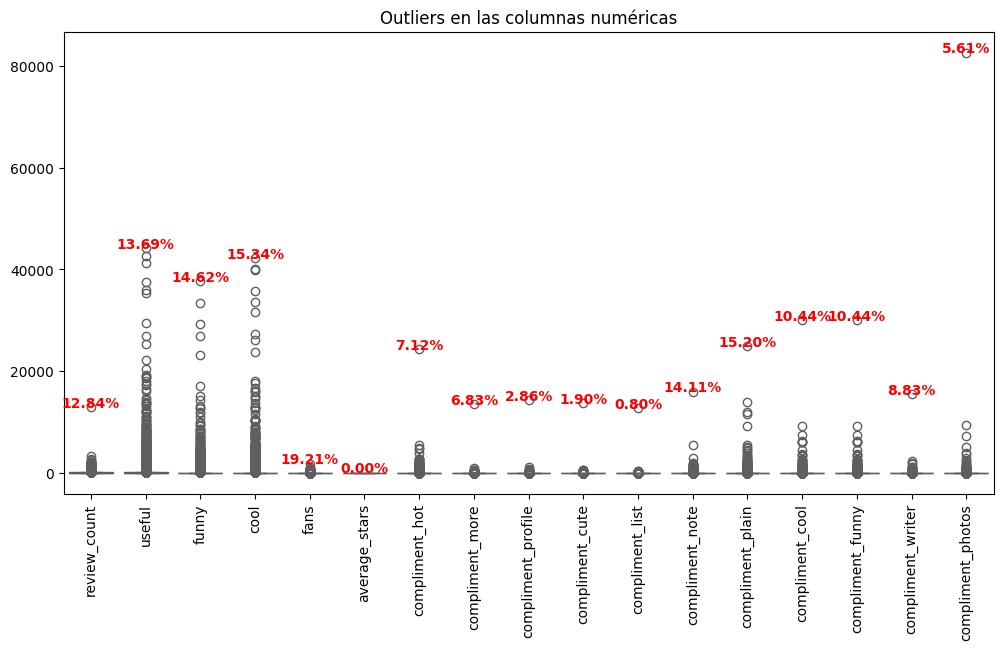

In [66]:
df_users_numericas = df_users.select_dtypes(include=['number'])

Q1 = df_users_numericas.quantile(0.25)
Q3 = df_users_numericas.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_users_numericas < (Q1 - 1.5 * IQR)) | (df_users_numericas > (Q3 + 1.5 * IQR)))

outliers_percentage = (outliers.sum() / len(df_users_numericas)) * 100

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_users_numericas, palette="Set3")
plt.title('Outliers en las columnas numéricas')

plt.xticks(rotation=90)

for i, col in enumerate(df_users_numericas.columns):
    plt.text(i, df_users_numericas[col].max(), f'{outliers_percentage[col]:.2f}%', 
             horizontalalignment='center', color='red', weight='bold')

plt.show()


Ahora veremos como se comporta el puntaje:

In [17]:
df_business['stars'].describe()

count    14590.000000
mean         3.622653
std          0.961215
min          1.000000
25%          3.000000
50%          4.000000
75%          4.500000
max          5.000000
Name: stars, dtype: float64

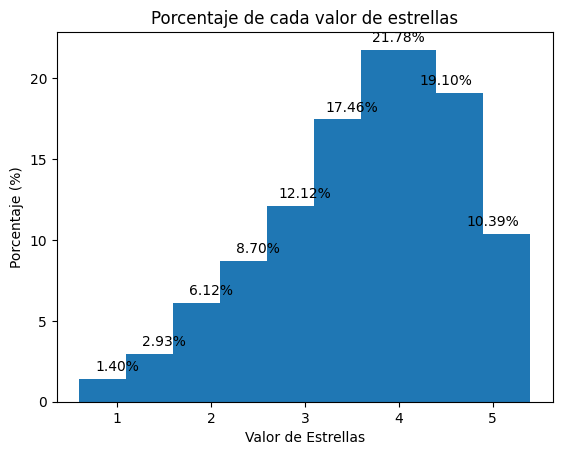

In [19]:
data = df_business['stars']
df = pd.DataFrame(data)

porcentajes = df['stars'].value_counts(normalize=True) * 100

porcentajes = porcentajes.sort_index()

plt.bar(porcentajes.index, porcentajes.values)

plt.xlabel('Valor de Estrellas')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de cada valor de estrellas')

for i, v in enumerate(porcentajes.values):
    plt.text(porcentajes.index[i], v + 0.5, f"{v:.2f}%", ha='center')

plt.show()

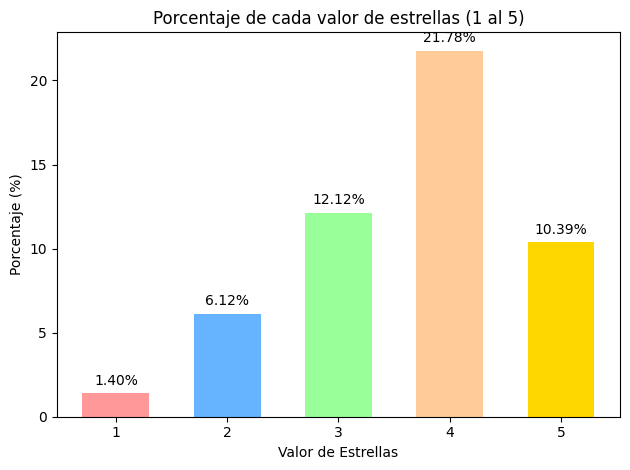

In [23]:

df_filtered = df[df['stars'].between(1, 5)]

porcentajes = df_filtered['stars'].value_counts(normalize=True).sort_index() * 100

porcentajes = porcentajes.reindex([1, 2, 3, 4, 5], fill_value=0)

colores = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']

posiciones = np.arange(len(porcentajes))  
ancho = 0.6  

plt.bar(posiciones, porcentajes.values, color=colores, width=ancho)


plt.xlabel('Valor de Estrellas')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de cada valor de estrellas (1 al 5)')

for i, v in enumerate(porcentajes.values):
    plt.text(posiciones[i], v + 0.5, f"{v:.2f}%", ha='center')

plt.xticks(posiciones, [1, 2, 3, 4, 5])

plt.tight_layout()

plt.show()

Vemos que hay pocas apreciaciones negativas en relacion a las que van desde el 3 al 5.

Sería interesante ver en general como se comportan los puntajes para todas las categorías:

C:\Users\Agustin\AppData\Local\Temp\ipykernel_13204\1627695287.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stars', y='categories', data=ranking, palette='viridis')


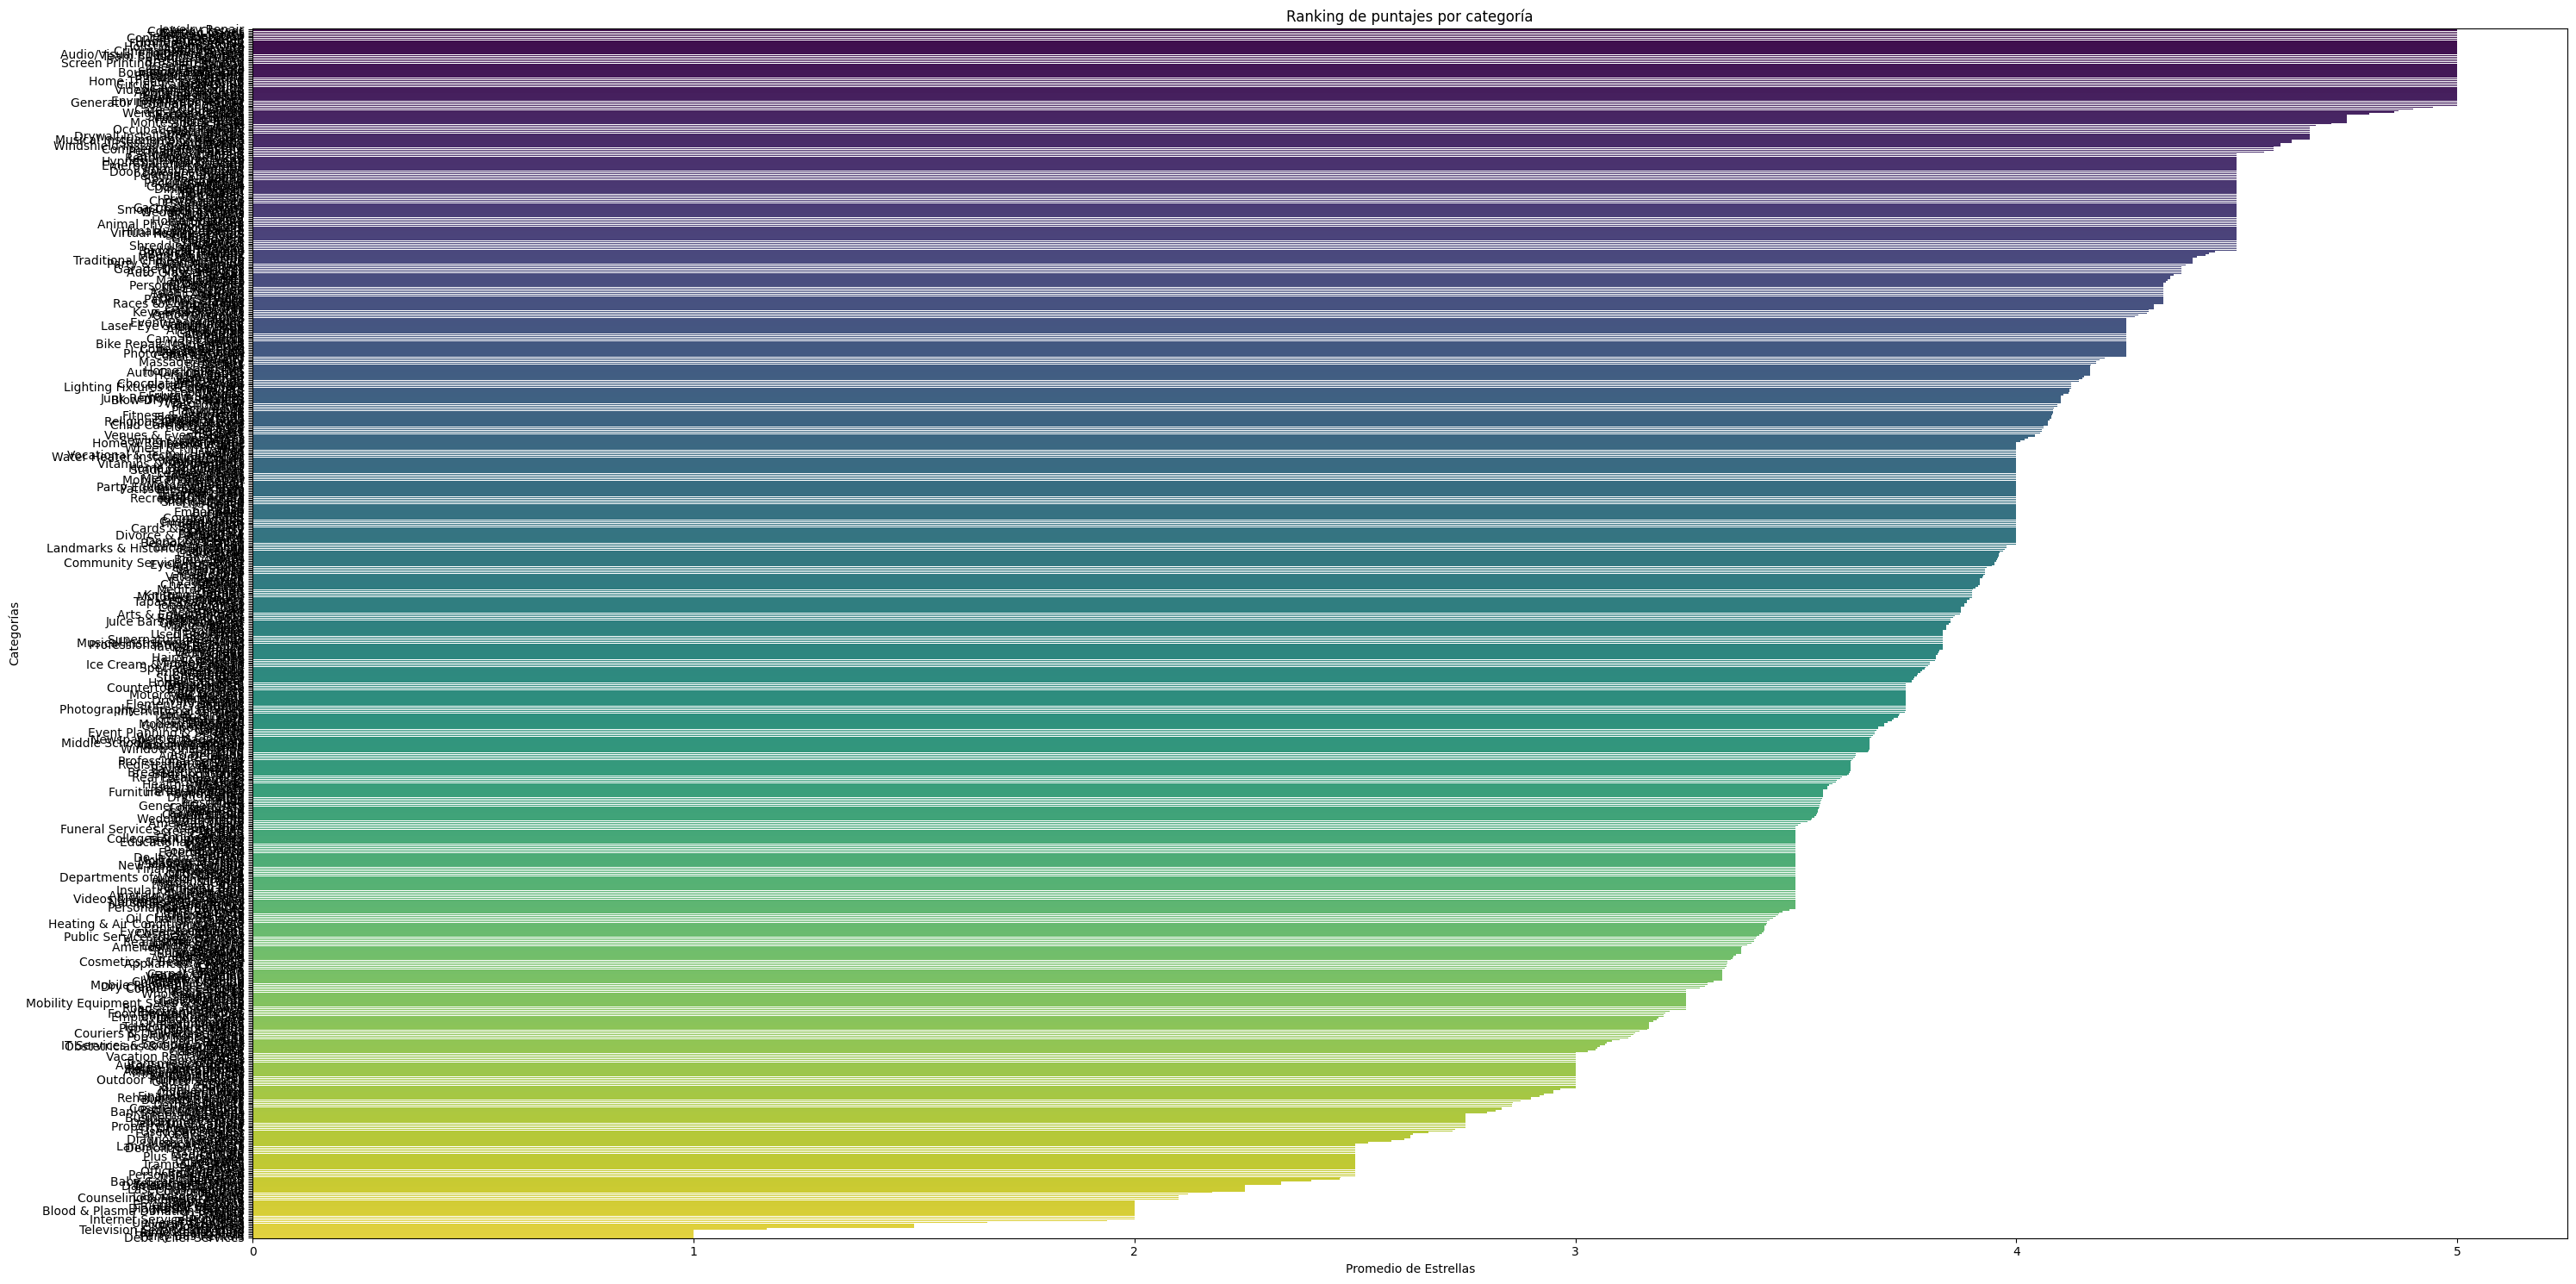

In [10]:
df_business['categories'] = df_business['categories'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

ranking = df_business.groupby('categories')['stars'].mean().reset_index()

ranking = ranking.sort_values(by='stars', ascending=False)

plt.figure(figsize=(30, 15))

sns.barplot(x='stars', y='categories', data=ranking, palette='viridis')

plt.title('Ranking de puntajes por categoría')
plt.xlabel('Promedio de Estrellas')
plt.ylabel('Categorías')

plt.tight_layout()
plt.show()


es evidente que hay hay muchas que tiene muy buenos puntajes y otras que tienen malos puntajes, veamos cuales son:

Vamos a graficas las que mejor y peor puntaje tienen, pero considerando que importa la cantidad de reseñas realizadas, mas alla que no haya correlacion con el puntaje en sí (a demostrar en la seccion siguiente), es importante porque nos puede representar el nivel de respuesta al negocio:

Voy a hacer un TOP 10 de cantidad de reseñas con la info del puntaje adentro:

C:\Users\Agustin\AppData\Local\Temp\ipykernel_16164\1261174096.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='stars_mean', y='categories', data=top_10, palette='Blues_r')


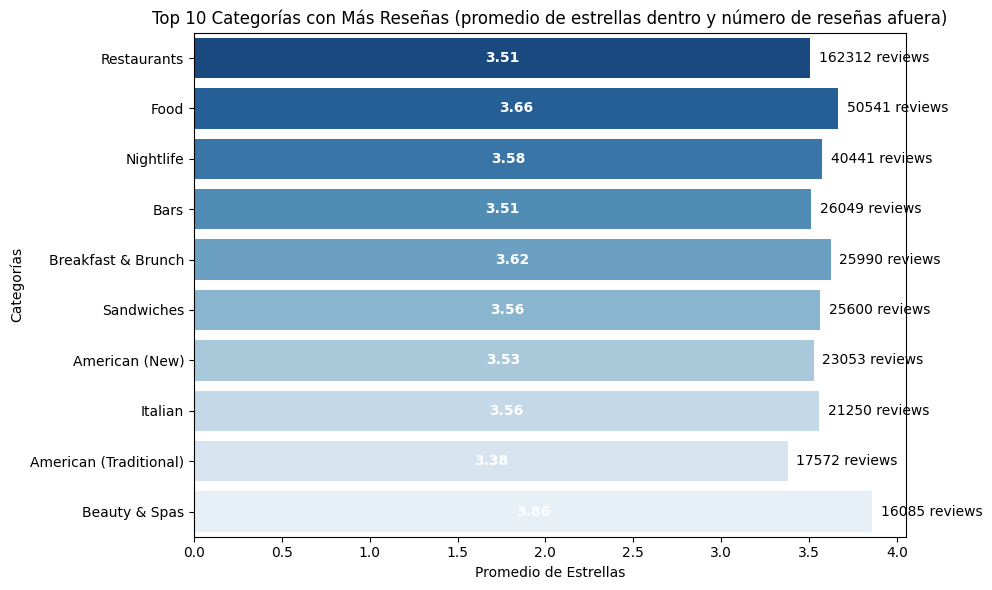

C:\Users\Agustin\AppData\Local\Temp\ipykernel_16164\1261174096.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='stars_mean', y='categories', data=bottom_10, palette='Reds_r')


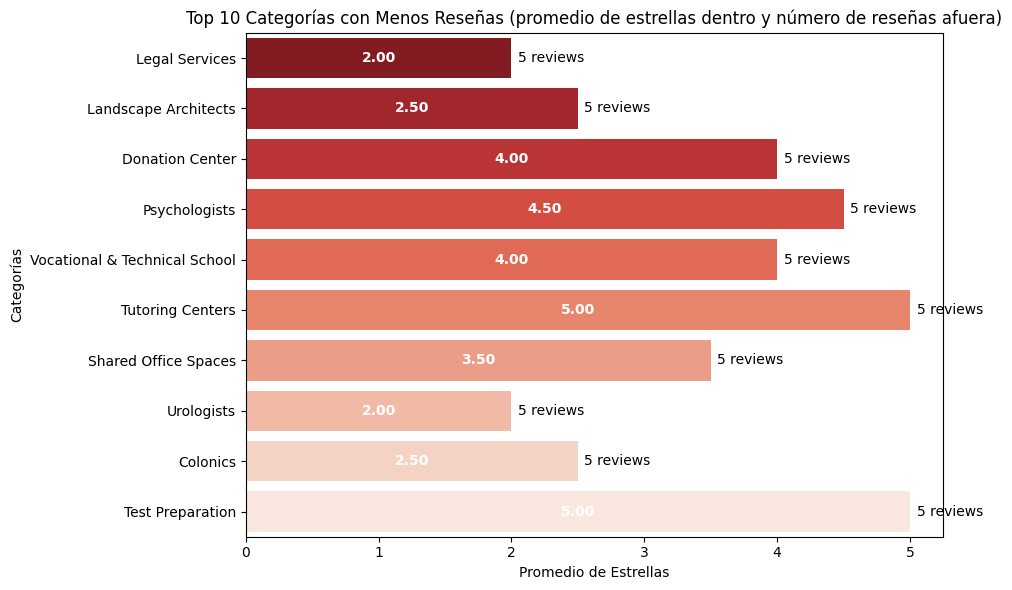

In [28]:
df_business['categories'] = df_business['categories'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

ranking = df_business.groupby('categories').agg(
    stars_mean=('stars', 'mean'),
    review_count_sum=('review_count', 'sum')
).reset_index()

ranking = ranking.sort_values(by='review_count_sum', ascending=False)

top_10 = ranking.head(10)

bottom_10 = ranking.tail(10)

def add_stars_mean_annotations(ax, data):
    for p, avg_stars in zip(ax.patches, data['stars_mean']):
        height = p.get_height()  
        ax.text(
            p.get_width() / 2,  
            p.get_y() + height / 2,  
            f'{avg_stars:.2f}',  
            ha='center', 
            va='center', 
            color='white', 
            weight='bold' 
        )

def add_review_count_annotations(ax, data):
    for p, total_reviews in zip(ax.patches, data['review_count_sum']):
        width = p.get_width() 
        ax.text(
            width + 0.05, 
            p.get_y() + p.get_height() / 2, 
            f'{int(total_reviews)} reviews', 
            va='center' 
        )

plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='stars_mean', y='categories', data=top_10, palette='Blues_r')

add_stars_mean_annotations(ax1, top_10)

add_review_count_annotations(ax1, top_10)

plt.title('Top 10 Categorías con Más Reseñas (promedio de estrellas dentro y número de reseñas afuera)')
plt.xlabel('Promedio de Estrellas')
plt.ylabel('Categorías')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='stars_mean', y='categories', data=bottom_10, palette='Reds_r')

add_stars_mean_annotations(ax2, bottom_10)

add_review_count_annotations(ax2, bottom_10)

plt.title('Top 10 Categorías con Menos Reseñas (promedio de estrellas dentro y número de reseñas afuera)')
plt.xlabel('Promedio de Estrellas')
plt.ylabel('Categorías')
plt.tight_layout()
plt.show()

Podemos ver que los restoranes (bares y vida nocturna) son el rubro con mas reseñas, por lo que podríamos considerarlo como el rubro con el cual entrenar nuestro modelo MVP.

Ahora analizaremos la correlacion que tienen cantidada de reseñas relizadas con los puntajes.

In [20]:
correlacion = df_business['review_count'].corr(df_business['stars'], method='pearson')

print(f'Coeficiente de correlación de Pearson entre review_count y stars: {correlacion}')

Coeficiente de correlación de Pearson entre review_count y stars: 0.0655147893638808


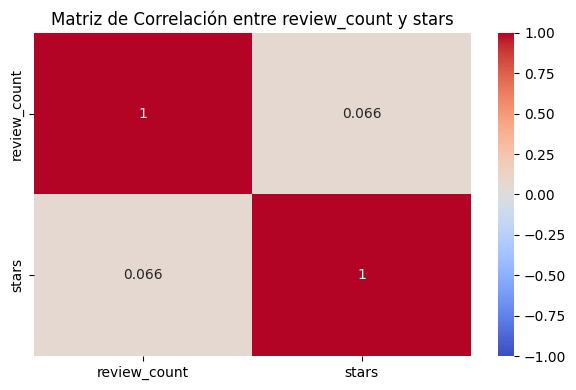

In [22]:
corr_matrix = df_business[['review_count', 'stars']].corr()

# Crear el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Añadir título
plt.title('Matriz de Correlación entre review_count y stars')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

No hay una correlacion significativa entre la cantidad de reseñas y el puntaje.


Ahora veremos de Users, como se comportan las apreciaciones a las reseñas hechas:

In [4]:
df_users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
706,cs0nysSMTvZiSH2wT0lziw,Daniel,31,2010-05-31 23:39:00,14,4,3,,"6XwMvX4ToWjilX3tstVMRg, aACIvjX3mTBm7XVGGvVk9Q...",2,...,2,0,0,0,0,1,0,0,0,0
707,DAu7QqovDW9VYgede5Biaw,Joel,38,2010-08-01 04:02:38,34,5,10,,"5-LXxNNX8hH0Qk16BlPU3A, w6sICte1gxxcOLf07P2jJw...",0,...,0,0,0,0,0,1,1,1,1,0
708,LuqyPE3xroo7Xrfcjj6z8A,Christina,16,2012-05-28 00:21:27,11,1,3,,"sysNq-U9mqc4zwu35-TVyA, BEoayd4B4WzDAMFJhU5V2g...",0,...,0,0,0,0,0,0,0,0,0,0
709,5DWsroQkck8nx1nB2aB5GQ,Jason,33,2010-03-05 01:40:48,23,1,4,,"PddJUq7mkFPlxmwKT6XEGg, 3rueKs2FQFNrzlJHiAn7JA...",1,...,0,0,0,0,2,0,1,1,0,1
710,Myh93sMRvNtdMb7iZ_9FqA,Olena,364,2010-05-16 23:20:56,339,79,90,"2012,2013,2014,2015,2016","wCrg8GPUGMqP6fczjuM4_w, bM29zq9lMHCntkyd_kHChw...",13,...,2,1,0,0,6,5,5,5,2,3


Podemos entender si hay alguna proporción significativa de las reseñas útiles, pensando en nuestro modelo de negocio:

C:\Users\Agustin\AppData\Local\Temp\ipykernel_12560\518372745.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='review_count', data=df_final, palette='Blues')


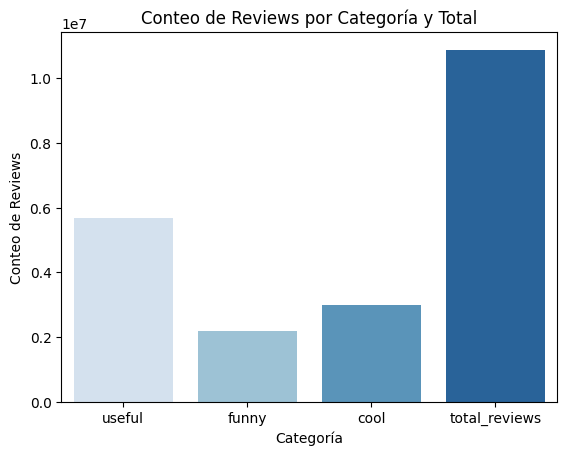

In [8]:
categorias = {'category': ['useful', 'funny', 'cool'],
              'review_count': [df_users['useful'].sum(), 
                               df_users['funny'].sum(), 
                               df_users['cool'].sum()]}

df_categorias = pd.DataFrame(categorias)

total_reviews = df_users[['useful', 'funny', 'cool']].sum().sum()

df_total = pd.DataFrame({'category': ['total_reviews'], 'review_count': [total_reviews]})

df_final = pd.concat([df_categorias, df_total], ignore_index=True)

sns.barplot(x='category', y='review_count', data=df_final, palette='Blues')

plt.title('Conteo de Reviews por Categoría y Total')
plt.ylabel('Conteo de Reviews')
plt.xlabel('Categoría')

plt.show()

Son mas las útiles que las graciosas o interesantes (cool)

C:\Users\Agustin\AppData\Local\Temp\ipykernel_16164\587748756.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='category', y='review_count', data=df_final, palette='Blues')


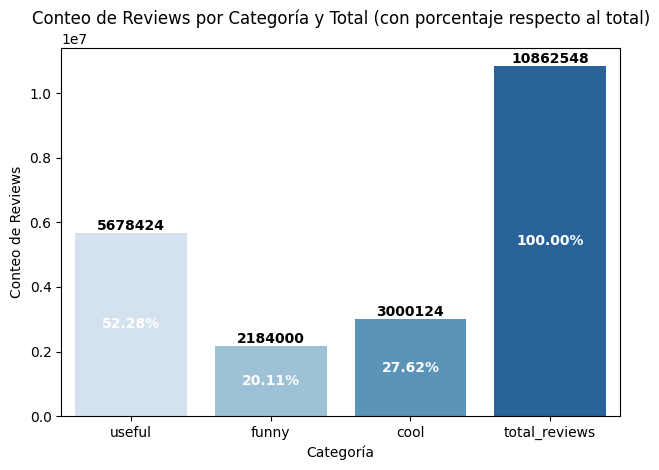

In [29]:
categorias = {'category': ['useful', 'funny', 'cool'],
              'review_count': [df_users['useful'].sum(), 
                               df_users['funny'].sum(), 
                               df_users['cool'].sum()]}

df_categorias = pd.DataFrame(categorias)

total_reviews = df_users[['useful', 'funny', 'cool']].sum().sum()

df_total = pd.DataFrame({'category': ['total_reviews'], 'review_count': [total_reviews]})
df_final = pd.concat([df_categorias, df_total], ignore_index=True)

ax = sns.barplot(x='category', y='review_count', data=df_final, palette='Blues')

def add_review_count_annotations(ax, data):
    for p in ax.patches:
        height = p.get_height() 
        ax.text(
            p.get_x() + p.get_width() / 2, 
            height, 
            f'{int(height)}', 
            ha='center',  
            va='bottom',  
            color='black', 
            weight='bold'  
        )

def add_percentage_annotations(ax, data, total_reviews):
    for p, review_count in zip(ax.patches, data['review_count']):
        height = p.get_height()  
        percentage = (review_count / total_reviews) * 100  
        ax.text(    
            p.get_x() + p.get_width() / 2, 
            height / 2, 
            f'{percentage:.2f}%',  
            ha='center', 
            va='center', 
            color='white',  
            weight='bold'  
        )

add_review_count_annotations(ax, df_final)
add_percentage_annotations(ax, df_final, total_reviews)

plt.title('Conteo de Reviews por Categoría y Total (con porcentaje respecto al total)')
plt.ylabel('Conteo de Reviews')
plt.xlabel('Categoría')

plt.tight_layout()
plt.show()


Podríamos pensar en usarlas para poder plantear mejoras de los negocios en base a estas devoluciones.

Ahora veremos de manera general las correlaciones posibles en este dataframe:

In [7]:
# Seleccionar solo las columnas numéricas relevantes
columns_of_interest = ['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars',
                       'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute',
                       'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool',
                       'compliment_funny', 'compliment_writer', 'compliment_photos']
df_numeric = df_users[columns_of_interest]

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                    review_count    useful     funny      cool      fans  \
review_count            1.000000  0.536649  0.399222  0.423483  0.570232   
useful                  0.536649  1.000000  0.939480  0.986331  0.748120   
funny                   0.399222  0.939480  1.000000  0.958400  0.647377   
cool                    0.423483  0.986331  0.958400  1.000000  0.691363   
fans                    0.570232  0.748120  0.647377  0.691363  1.000000   
average_stars           0.044873  0.014723  0.009848  0.014145  0.026881   
compliment_hot          0.187628  0.600627  0.699595  0.640796  0.332224   
compliment_more         0.103014  0.357536  0.436179  0.388706  0.130136   
compliment_profile      0.090887  0.341687  0.418745  0.373601  0.115713   
compliment_cute         0.085163  0.306927  0.380327  0.336831  0.101263   
compliment_list         0.075861  0.291238  0.359675  0.320657  0.082204   
compliment_note         0.208677  0.601828  0.683503  0.634199  0.352499   
compliment_p

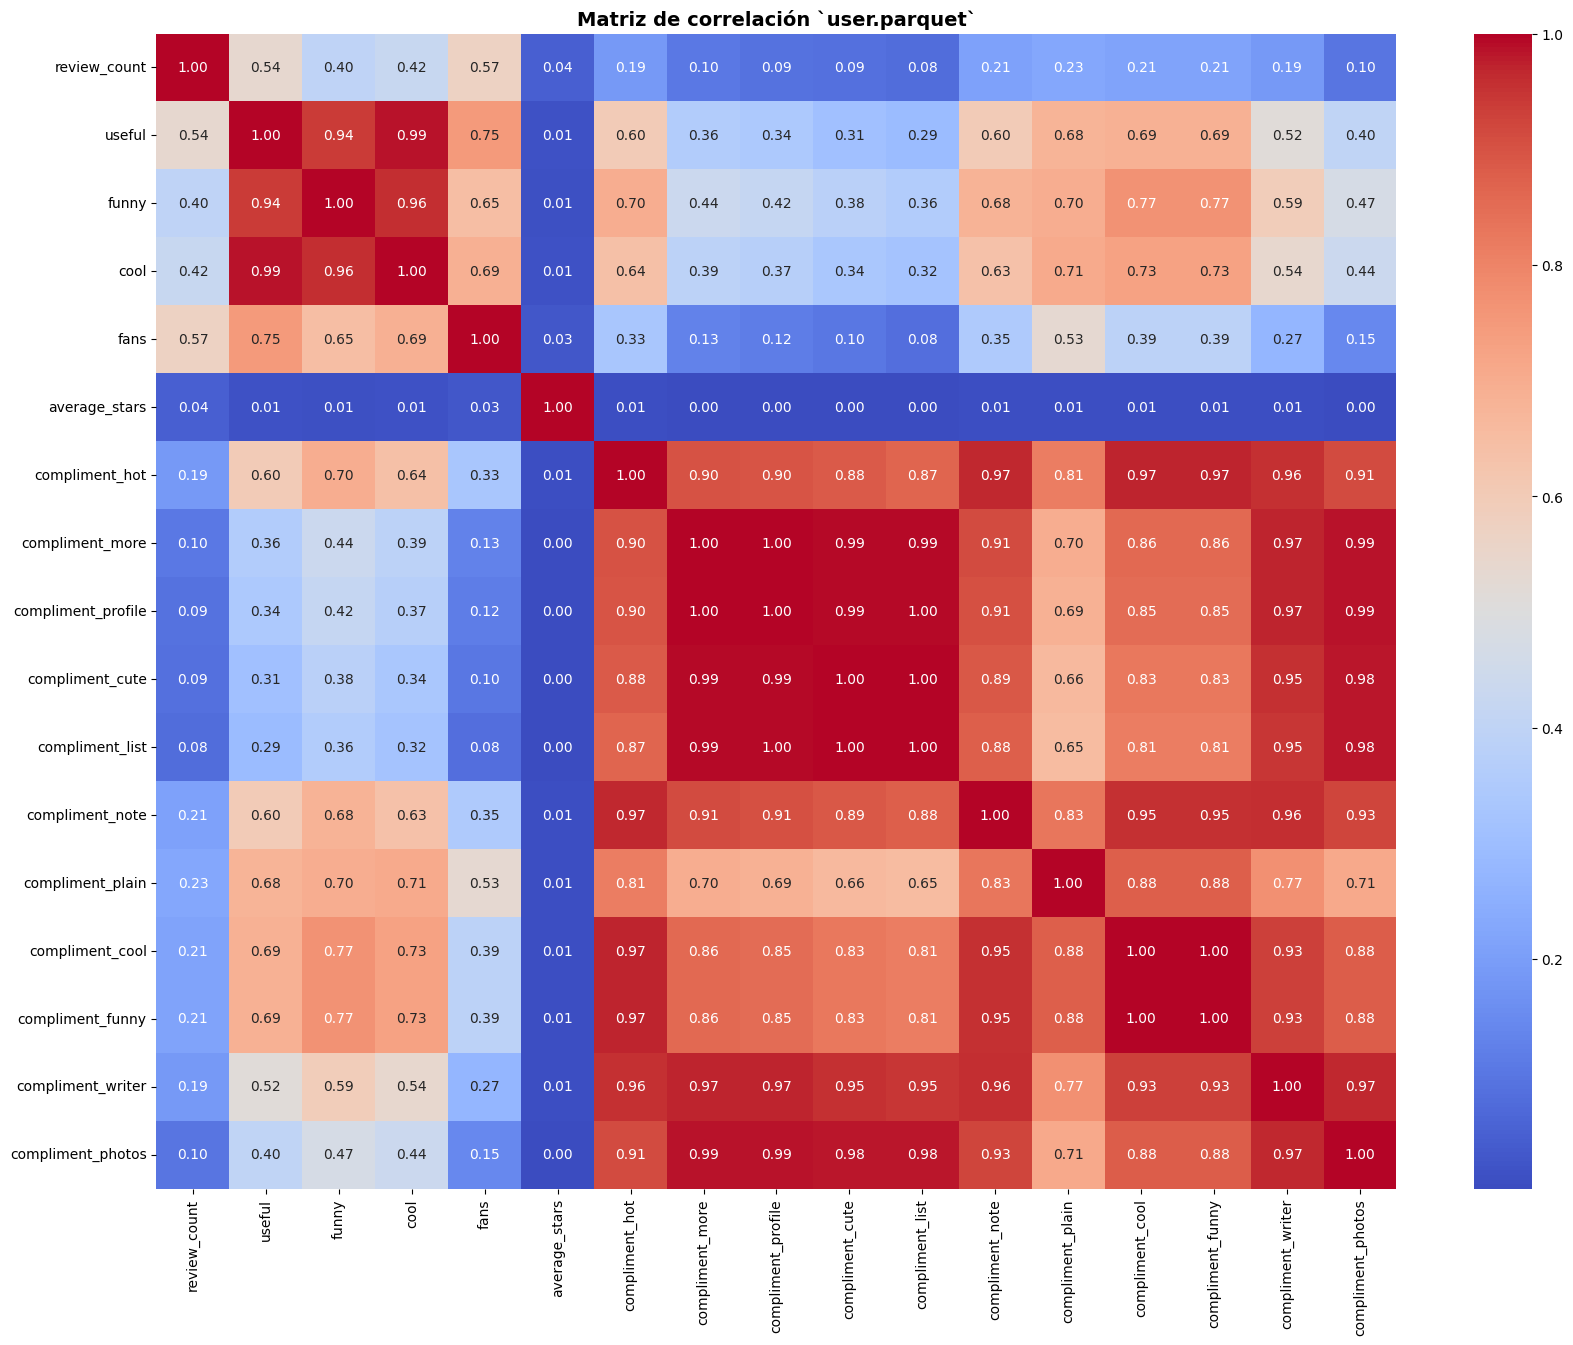

In [8]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación `user.parquet`', fontsize=14, fontweight='bold')
plt.show()

El primedio de estrellas no tiene correlacion con ningun otra columna. 
Quizà Fans con usefull, que tiene 0.75 de correlación podría servirnos en la etapa posterior (ML)

Segun el modelo de negocio que planteamos, resulta interesante analizar qué tipo de relacion hay entre compliment count (respuestas de la empresa) y los consejos dados por usuarios.-

In [34]:
valores_unicos = sorted(df_tips['compliment_count'].unique())
print(valores_unicos)

[0, 1, 2, 3]


C:\Users\Agustin\AppData\Local\Temp\ipykernel_16164\1571622348.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='compliment_count', y='total', data=df_valores, palette='Blues')


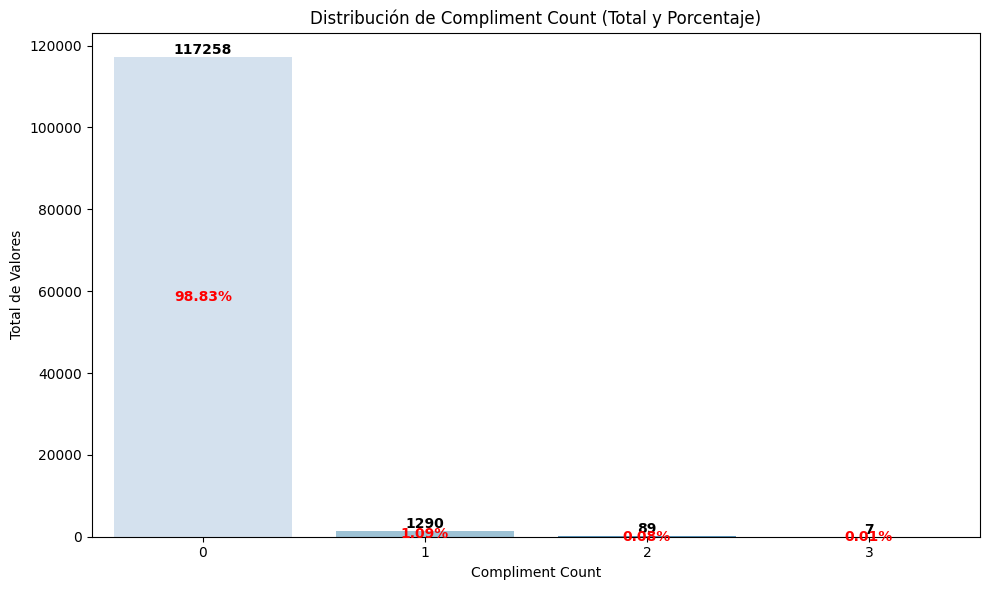

In [36]:
conteo_valores = df_tips['compliment_count'].value_counts()

porcentaje_valores = (conteo_valores / conteo_valores.sum()) * 100

df_valores = pd.DataFrame({
    'compliment_count': conteo_valores.index,
    'total': conteo_valores.values,
    'porcentaje': porcentaje_valores.values
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='compliment_count', y='total', data=df_valores, palette='Blues')

for p, total, porcentaje in zip(ax.patches, df_valores['total'], df_valores['porcentaje']):
    
    ax.text(
        p.get_x() + p.get_width() / 2,  
        p.get_height(),  
        f'{total}',  
        ha='center', va='bottom', color='black', weight='bold'
    )

    ax.text(
        p.get_x() + p.get_width() / 2, 
        p.get_height() / 2,
        f'{porcentaje:.2f}%',  
        ha='center', va='center', color='red', weight='bold'
    )

plt.title('Distribución de Compliment Count (Total y Porcentaje)')
plt.xlabel('Compliment Count')
plt.ylabel('Total de Valores')
plt.tight_layout()

plt.show()


Compliment count no es significativo para usar en nuestro análisis.

Ahora vamos a pasar a los dataframes de Google Maps.

In [37]:
df_NY.head(2)

,user_id,name,time,rating,text,pics,gmap_id,timeResp,textResp
0,1.137221e+20,Alvin Martinez,1603494795361,5,I'm late to posting this but this store especi...,[{'url': ['https://lh5.googleusercontent.com/p...,0x89c25fc9494dce47:0x6d63c807b59a55,0,None
1,1.072934e+20,Johnnie Jackson,1620157037403,1,Very dissatisfied I did not get my phone the p...,None,0x89c25fc9494dce47:0x6d63c807b59a55,1620268360920,We pride ourselves on providing an awesome exp...


vemos que aqui hay comentarios, con la info del usuario, puntaje del comentario y la respuesta al comentario.-

In [53]:
df_NY.size

23765967

Es interesante tratar de revelar si la presencia o no de una respuesta (textResp) altera el puntaje

In [58]:
df_NY['has_text'] = df_NY['textResp'].apply(lambda x: 1 if isinstance(x, str) and x.strip() else 0)

correlation = df_NY['rating'].corr(df_NY['has_text'])

print("Correlación entre rating y la presencia de texto en textResp:", correlation)


Correlación entre rating y la presencia de texto en textResp: 0.0139977302926648


La correlación no es representativa

Vamos a ver un boxplot para entender la distribución en estos datos:

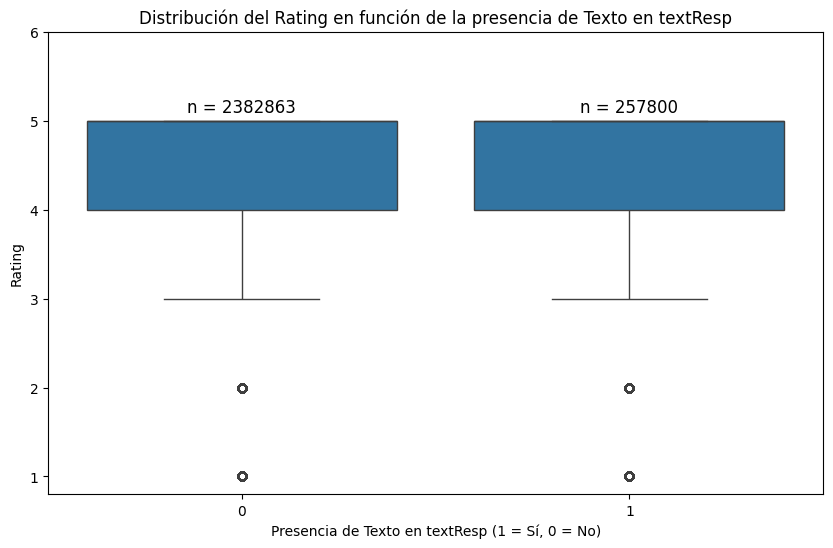

In [62]:
df_NY['has_text'] = df_NY['textResp'].apply(lambda x: 1 if isinstance(x, str) and x.strip() else 0)

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='has_text', y='rating', data=df_NY)

for i in range(df_NY['has_text'].nunique()):
    n_obs = df_NY[df_NY['has_text'] == i].shape[0]
    ax.text(i, df_NY['rating'].max() + 0.1, f'n = {n_obs}', ha='center', fontsize=12, color='black')

plt.xlabel('Presencia de Texto en textResp (1 = Sí, 0 = No)')
plt.ylabel('Rating')
plt.title('Distribución del Rating en función de la presencia de Texto en textResp')
plt.ylim(top=df_NY['rating'].max() + 1) 
plt.show()

Aunque ya sepamos que no hay correlacion, vamos a ver qué tan útil son esas columnas en relacion a sus valores faltantes

In [67]:
df_NY_selected = df_NY[['rating', 'text', 'textResp']]
print(df_NY_selected)

         rating                                               text  \
0             5  I'm late to posting this but this store especi...   
1             1  Very dissatisfied I did not get my phone the p...   
2             5  Excellent very well done with professional car...   
3             5  Basing my review strictly on the service I rec...   
4             1  Bad! Disorganized. I'm being totally honest. I...   
...         ...                                                ...   
2699995       4                                               None   
2699996       5                                               None   
2699997       5                                               None   
2699998       5                                               None   
2699999       5                                               None   

                                                  textResp  
0                                                     None  
1        We pride ourselves on provid

In [68]:
missing_values_summary = df_NY_selected.isnull().sum()

print("Resumen de valores nulos o vacíos en cada columna:")
print(missing_values_summary)


Resumen de valores nulos o vacíos en cada columna:
rating            0
text        1159136
textResp    2382863
dtype: int64


In [67]:
reporte_analisis(df_NY)

            Valores nulos  Porcentaje nulos (%)  Outliers  \
gmap_id               0.0              0.000000       NaN   
name                  0.0              0.000000       NaN   
rating                0.0              0.000000  226827.0   
text            1159136.0             43.895643       NaN   
textResp        2382863.0             90.237300       NaN   
time                  0.0              0.000000   37523.0   
timeResp              0.0              0.000000  257800.0   
user_id               0.0              0.000000       0.0   
Duplicados            0.0              0.000000       NaN   

            Porcentaje outliers (%)  
gmap_id                         NaN  
name                            NaN  
rating                     8.589775  
text                            NaN  
textResp                        NaN  
time                       1.420969  
timeResp                   9.762700  
user_id                    0.000000  
Duplicados                      NaN  


,Valores nulos,Porcentaje nulos (%),Outliers,Porcentaje outliers (%)
gmap_id,0.0,0.000000,NaN,NaN
name,0.0,0.000000,NaN,NaN
rating,0.0,0.000000,226827.0,8.589775
text,1159136.0,43.895643,NaN,NaN
textResp,2382863.0,90.237300,NaN,NaN
time,0.0,0.000000,37523.0,1.420969
timeResp,0.0,0.000000,257800.0,9.762700
user_id,0.0,0.000000,0.0,0.000000
Duplicados,0.0,0.000000,NaN,NaN


C:\Users\Agustin\AppData\Local\Temp\ipykernel_16164\2395551375.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x + width/2., y + height + 0.5, f'{missing_counts[i]}', ha='center', va='bottom', color='black', fontsize=12)


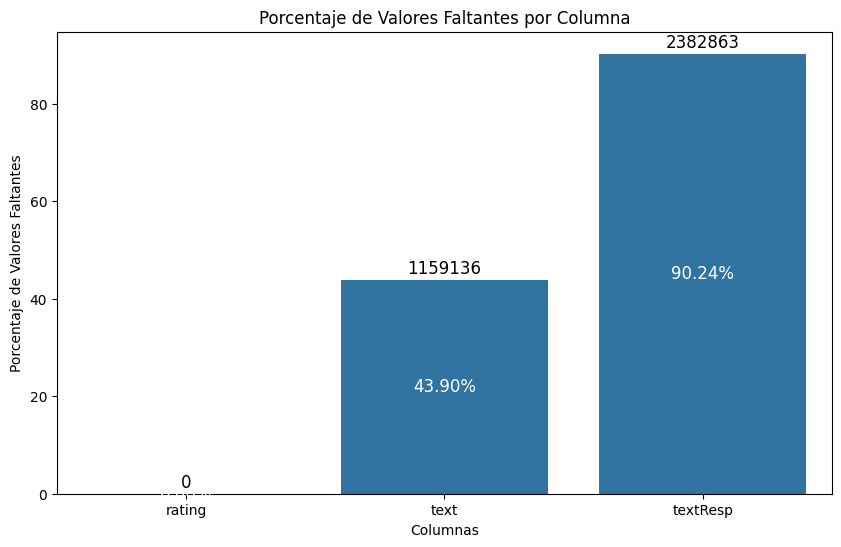

In [70]:
df_selected = df_NY[['rating', 'text', 'textResp']]

missing_percentage = df_selected.isnull().mean() * 100
missing_counts = df_selected.isnull().sum()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_percentage.index, y=missing_percentage.values)

for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.text(x + width/2., y + height/2., f'{height:.2f}%', ha='center', va='center', color='white', fontsize=12)
    ax.text(x + width/2., y + height + 0.5, f'{missing_counts[i]}', ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Valores Faltantes')
plt.title('Porcentaje de Valores Faltantes por Columna')
plt.show()


vemos que aprox el 50% de las veces que se puntua se acompaña el puntaje con un comentario, y aprox el (15%) se obtiene una respuesta.

C:\Users\Agustin\AppData\Local\Temp\ipykernel_16164\720133873.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x + width/2., y + height + 0.5, f'{missing_counts[i]}', ha='center', va='bottom', color='black', fontsize=12)


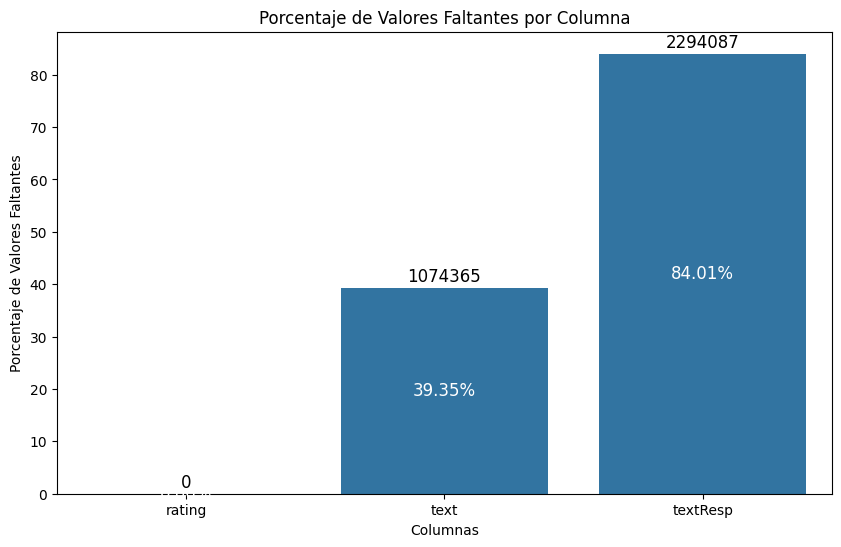

In [71]:
df_selected = df_FLORIDA[['rating', 'text', 'textResp']]

missing_percentage = df_selected.isnull().mean() * 100
missing_counts = df_selected.isnull().sum()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_percentage.index, y=missing_percentage.values)

for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.text(x + width/2., y + height/2., f'{height:.2f}%', ha='center', va='center', color='white', fontsize=12)
    ax.text(x + width/2., y + height + 0.5, f'{missing_counts[i]}', ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Valores Faltantes')
plt.title('Porcentaje de Valores Faltantes por Columna')
plt.show()

voy a ver esto pero como resumen de los valores faltantes de todos los DF

In [74]:
dataframes = {
    'NY': df_NY,
    'CALIFORNIA': df_CALIFORNIA,
    'FLORIDA': df_FLORIDA,
    'NEVADA': df_NEVADA,
    'PENNSYLVANIA': df_PENNSYLVANIA,
    'TEXAS': df_TEXAS
}

missing_values_summary = {'DataFrame': [], 'text': [], 'textResp': []}

for name, df in dataframes.items():
    total_rows = df.shape[0]
    missing_values_summary['DataFrame'].append(name)
    missing_values_summary['text'].append((df['text'].isnull().sum() / total_rows) * 100)
    missing_values_summary['textResp'].append((df['textResp'].isnull().sum() / total_rows) * 100)

summary_df = pd.DataFrame(missing_values_summary)

summary_df.loc[-1] = ['Porcentaje de valores faltantes'] + [''] * (summary_df.shape[1] - 1)
summary_df.index = summary_df.index + 1
summary_df = summary_df.sort_index()

print(summary_df)


                         DataFrame       text   textResp
0  Porcentaje de valores faltantes                      
1                               NY  43.895643    90.2373
2                       CALIFORNIA  44.340219  90.915083
3                          FLORIDA  39.345324  84.013903
4                           NEVADA  41.356546  87.509565
5                     PENNSYLVANIA  43.879773  87.530172
6                            TEXAS  40.845963  83.710053


Lo que corresponde a TEXTRESP no podríamos usarlo por el alto porcentaje de valores faltantes, por otro lado que haya texto no parece alterar el puntaje recibido

Sería útil ver si hay comentarios duplicados:  

In [70]:
df_NY_text = df_NY[['text']].copy()
print(df_NY_text.columns)

Index(['text'], dtype='object')


In [71]:
analizar_duplicados(df_NY_text)

   Valores duplicados  Porcentaje duplicados (%)
0             1332696                  50.468235


,Valores duplicados,Porcentaje duplicados (%)
0,1332696,50.468235


Podemos decir que los textos duplicados tienen una proprción significativa, esto puede llegar a ser contraproducente cuando se relacione el texto con el puntaje asociado, si el mismo texto tiene diferentes puntajes por ejemplo.

Voy a analizar esto mismo para todas las ciudades:

In [72]:
df_CALIFORNIA_text = df_CALIFORNIA[['text']].copy()
df_FLORIDA_text = df_FLORIDA[['text']].copy()
df_NEVADA_text = df_NEVADA[['text']].copy()
df_PENNSYLVANIA_text = df_PENNSYLVANIA[['text']].copy()
df_TEXAS_text = df_TEXAS[['text']].copy()

In [74]:
analizar_duplicados(df_CALIFORNIA_text)
analizar_duplicados(df_FLORIDA_text)
analizar_duplicados(df_NEVADA_text)
analizar_duplicados(df_PENNSYLVANIA_text)
analizar_duplicados(df_TEXAS_text)

   Valores duplicados  Porcentaje duplicados (%)
0             1320852                   50.32283
   Valores duplicados  Porcentaje duplicados (%)
0             1260474                  46.160996
   Valores duplicados  Porcentaje duplicados (%)
0              853944                  48.080943
   Valores duplicados  Porcentaje duplicados (%)
0             1194159                  50.462426
   Valores duplicados  Porcentaje duplicados (%)
0             1048585                   46.90732


,Valores duplicados,Porcentaje duplicados (%)
0,1048585,46.90732


Todos los dataframes tienen un porcentaje cercano al 50% de duplicados en los textos